<a href="https://colab.research.google.com/github/krishnaaxo/Stroke-Prediction/blob/main/AutoSklearn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
pip install autoviz

In [ ]:
pip install dask distributed --upgrade

In [ ]:
!pip install scikit-learn==0.24.0

In [ ]:
pip install auto-sklearn

In [8]:
# Import Lab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from autosklearn.classification import AutoSklearnClassifier

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [55]:
df= pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [56]:
del df['id']

In [57]:
df.head().T

,0,1,2,3,4
gender,Male,Female,Male,Female,Female
age,67,61,80,49,79
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24
smoking_status,formerly smoked,never smoked,never smoked,smokes,never smoked


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [13]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


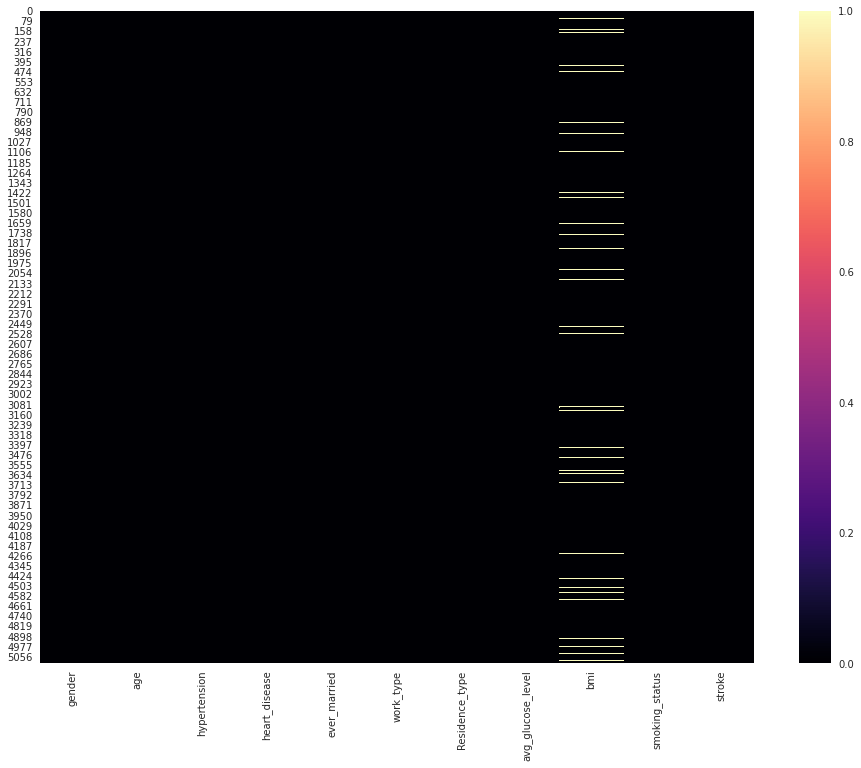

In [58]:
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cmap = 'magma')

In [70]:

df.fillna(df.mean(), inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['work_type'] = le.fit_transform(df['work_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


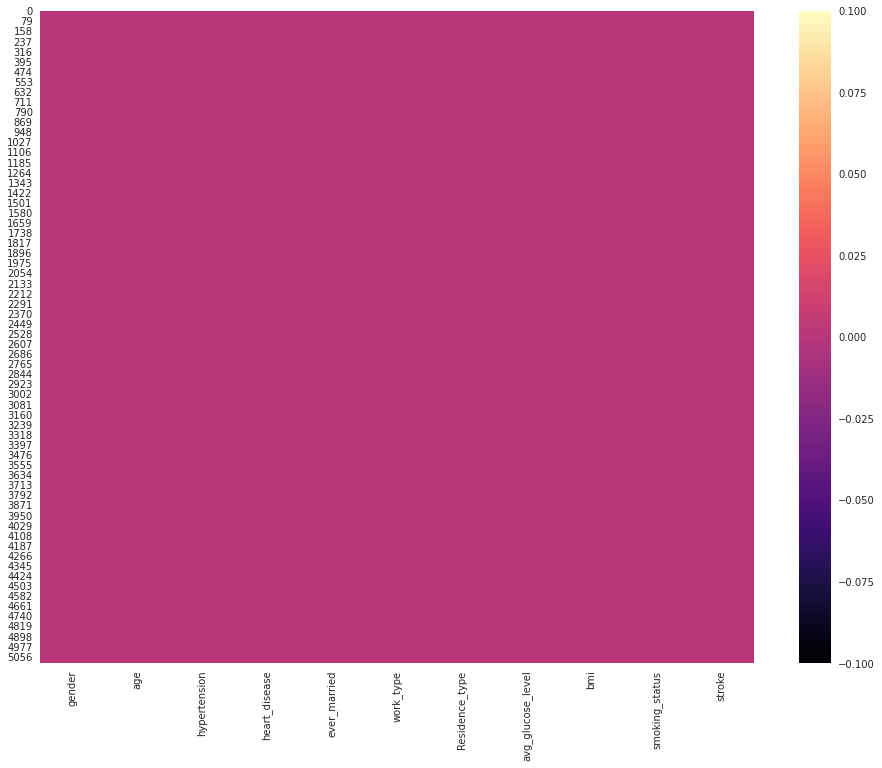

In [71]:
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cmap = 'magma')

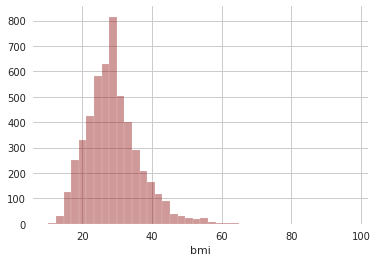

In [72]:
sns.distplot(df['bmi'].dropna(),kde=False,color='darkred',bins=40)

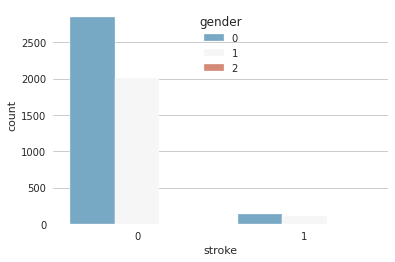

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='stroke',hue='gender',data=df,palette='RdBu_r')

Shape of your Data Set: (5110, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


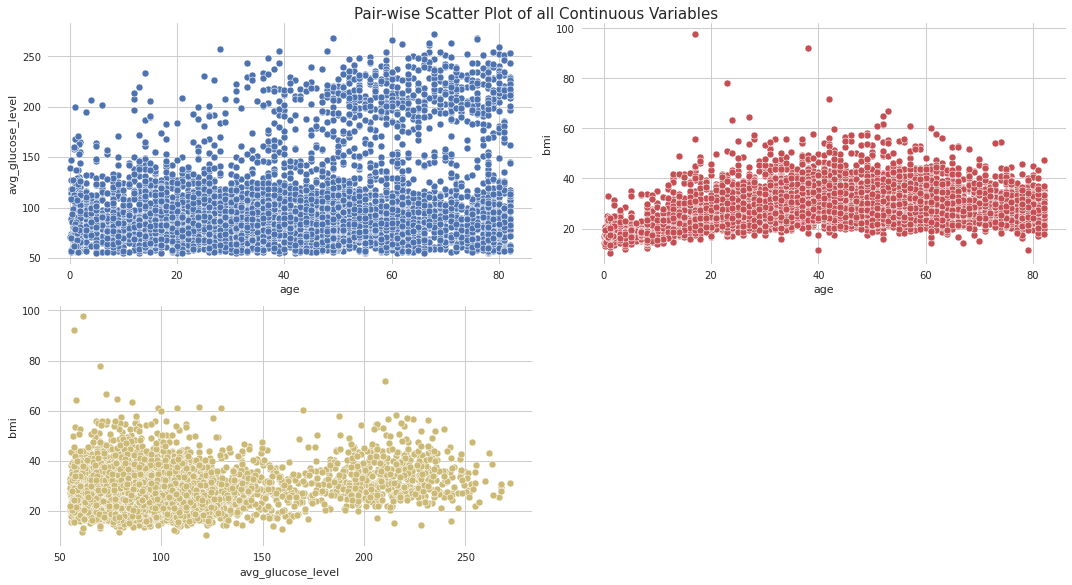

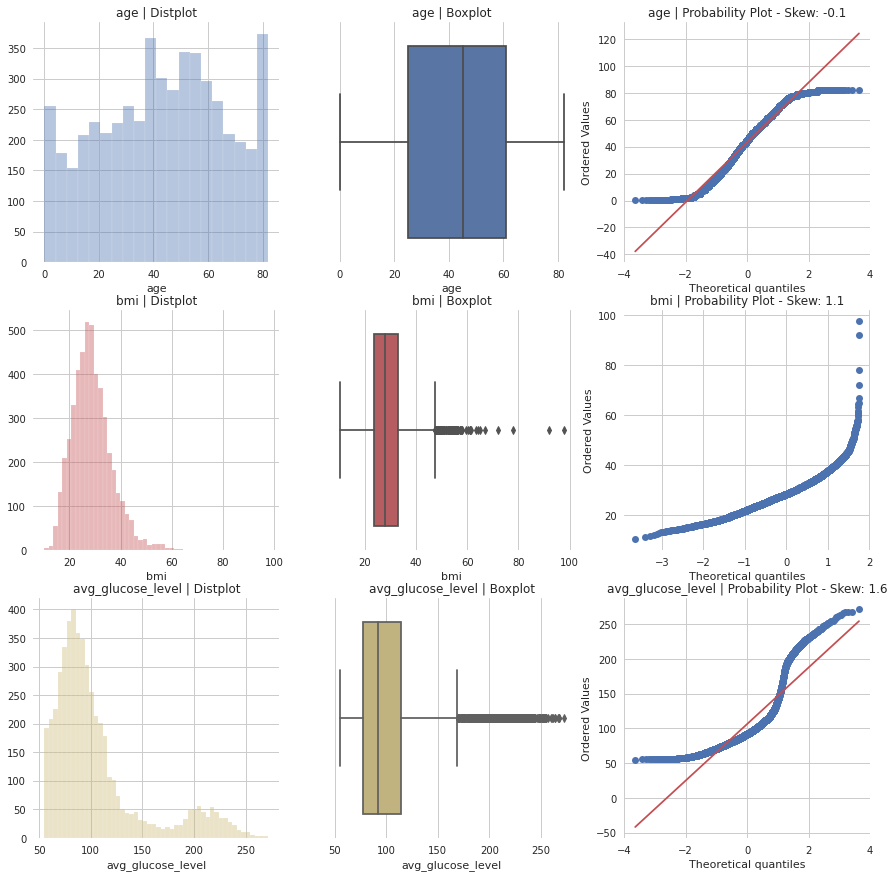

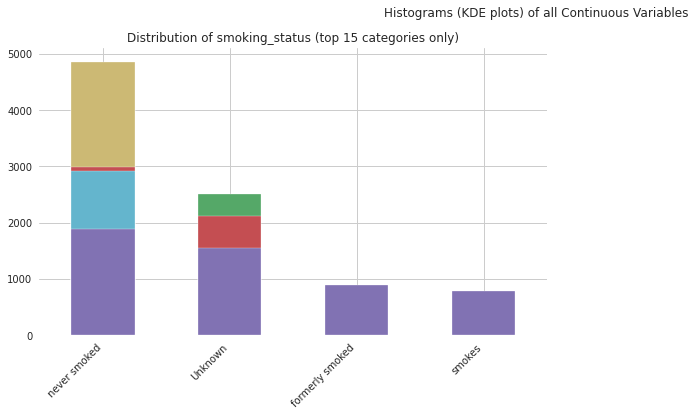

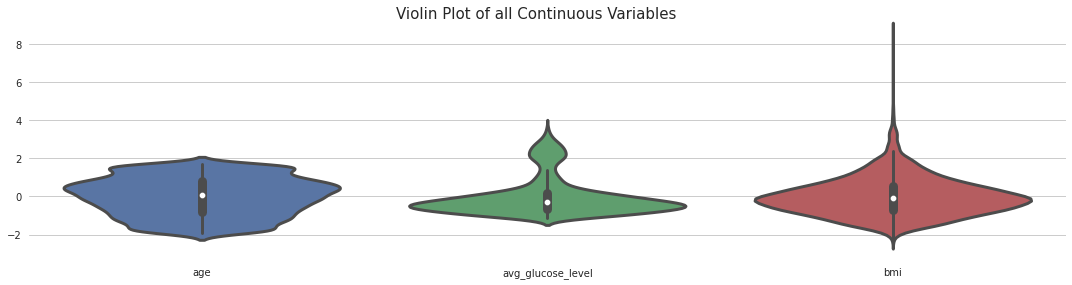

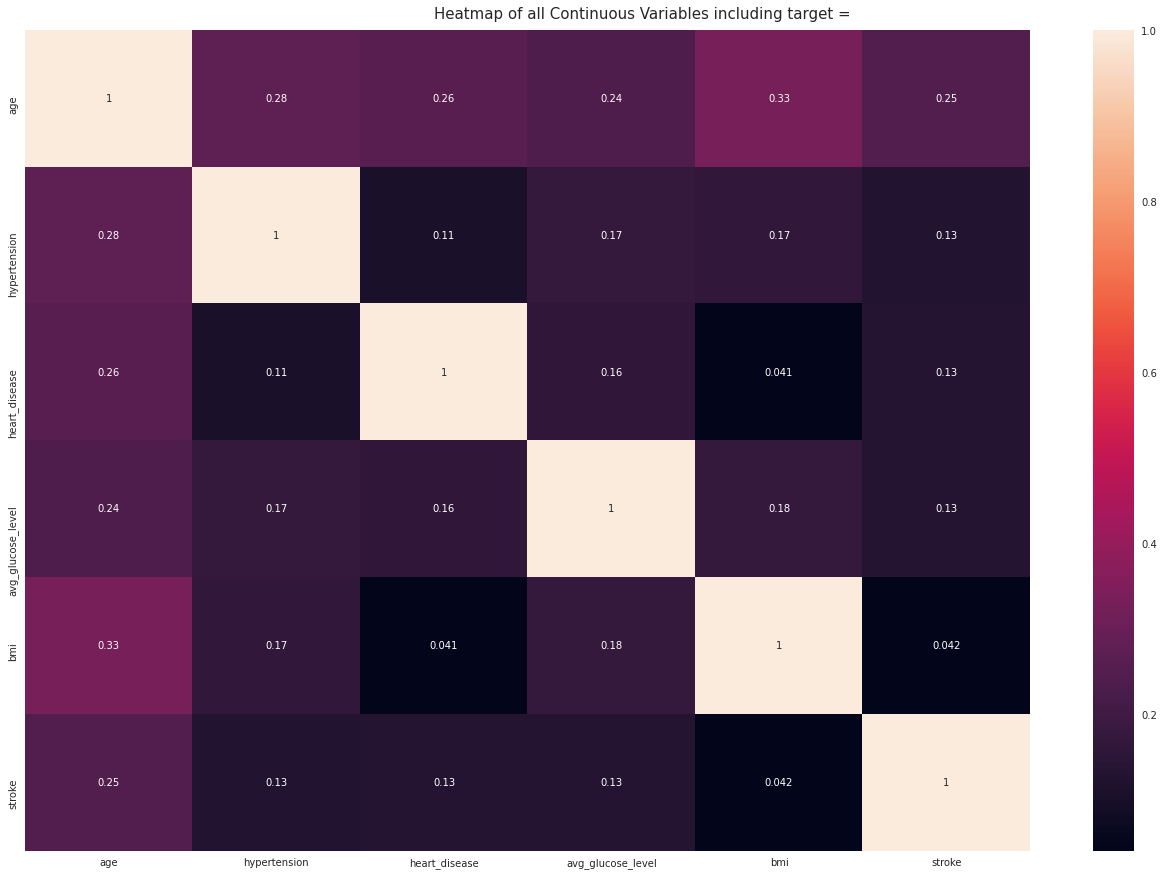

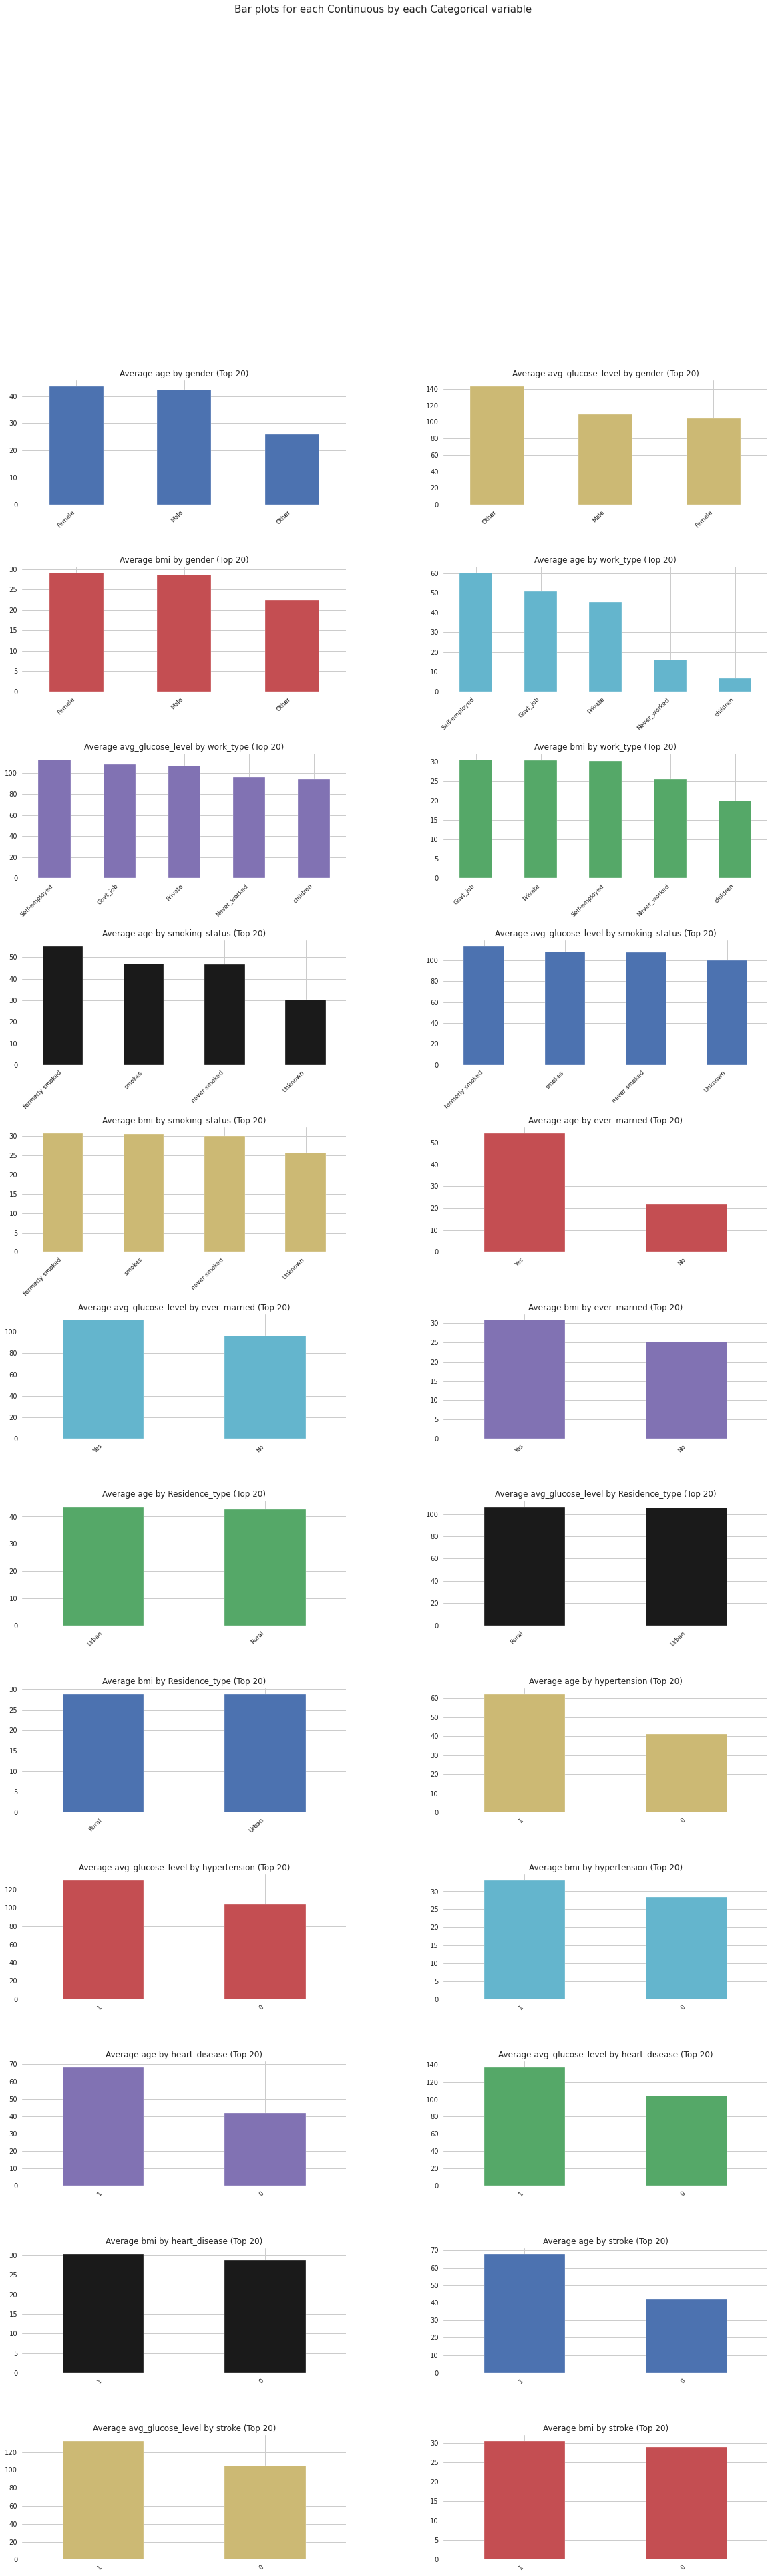

Time to run AutoViz (in seconds) = 10.305

 ###################### VISUALIZATION Completed ########################


In [65]:
df = AV.AutoViz('/content/healthcare-dataset-stroke-data.csv')

In [66]:
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['stroke'], axis=1),
    df['stroke'],
    test_size=0.3,
    random_state=0)

In [84]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00270217, 0.0446133 , 0.00576819, 0.0052982 , 0.00124222,
       0.01185682, 0.        , 0.        , 0.00935157, 0.00136356])

In [85]:

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

age                  0.044613
work_type            0.011857
bmi                  0.009352
hypertension         0.005768
heart_disease        0.005298
gender               0.002702
smoking_status       0.001364
ever_married         0.001242
avg_glucose_level    0.000000
Residence_type       0.000000
dtype: float64

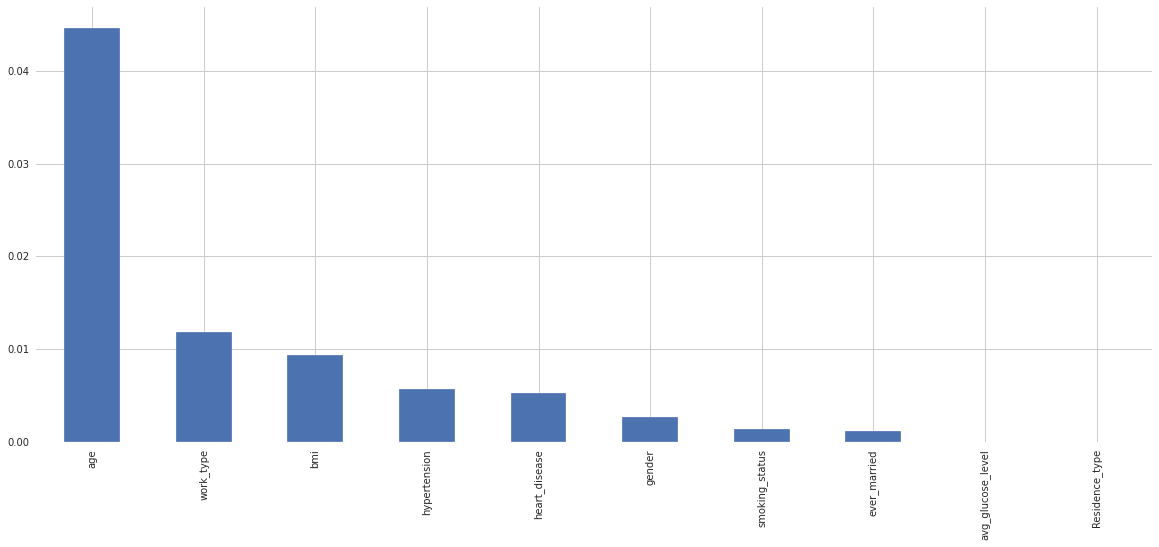

In [86]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [89]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=7)
sel_five_cols.fit(X_train, y_train)
c=X_train.columns[sel_five_cols.get_support()]
c

Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'bmi'],
      dtype='object')

In [91]:
X_train=X_train[c]
X_test=X_train[c]

In [97]:
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_test.shape)


Training Shape x: (3577, 7)
Testing Shape x: (3577, 7)


In [98]:
from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()
X_train= s_scaler.fit_transform(X_train)
X_test= s_scaler.fit_transform(X_test)

In [103]:
model = AutoSklearnClassifier(time_left_for_this_task=600, 
                              per_run_time_limit=10, 
                              ensemble_size=2, 
                              initial_configurations_via_metalearning=2)
# Init training
model.fit(X_train, y_train)

[WARNING] [2021-05-03 20:31:21,511:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-05-03 20:31:24,515:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 2. Number of dummy models: 1
[WARNING] [2021-05-03 20:31:27,519:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 3. Number of dummy models: 1
[WARNING] [2021-05-03 20:31:31,448:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 4. Number of dummy models: 1
[WARNING] [2021-05-03 20:31:36,587:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 5. Number of dummy models: 1
[WARNING] [2021-05-03 20:31:41,061:Client-EnsembleBuilder] No models better than random - 

AutoSklearnClassifier(ensemble_size=2,
                      initial_configurations_via_metalearning=2,
                      per_run_time_limit=10, time_left_for_this_task=600)

In [105]:
model.score(X_train, y_train)

0.9521945764607213

In [108]:
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: 832e251c-ac4e-11eb-8264-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.953429
  Number of target algorithm runs: 96
  Number of successful target algorithm runs: 87
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 9
  Number of target algorithms that exceeded the memory limit: 0



In [112]:
import joblib

In [113]:
joblib.dump(model, 'model2.pkl')

['model2.pkl']